<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Patricia Buenrostro Mendez, Daniel García Hernández

**Fecha:** 29 de febrero del 2020.

**Expediente** : 715066, 715989.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6: Clase 10

## Parámetros de entrega
Voy a habilitar un link en Canvas donde deben de subir su cuaderno de python con la sulución de los problemas planteados en parejas. La podrán entregar a mas tardar el Jueves 5 de marzo a las 6pm. Como será en parejas, deben de crear un proyecto conjunto en github y realizar los ejercicios de manera conjunta, de manera similar a como realizaron los ejercicios en la tarea 1. **Deben de poner en la solución de la tarea el enlace de github de el administrador del repositorio**, del cuál me basaré para poner la calificación.

### Ejercicio 1: 
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

Tomamos 
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
y sustituimos $k$ por $k+1$
$$P(k+1) = \frac{e^{-\lambda}\lambda^{k+1}}{(k+1)!}$$
separamos $\lambda^{k+1}$ en $\lambda^{k}\lambda^{1}$ y obtenemos
$$P(k+1) = \frac{e^{-\lambda}\lambda^{k}\lambda^{1}}{(k+1)!}$$
usamos la siguiente propiedad $n! = n(n-1)!$ pero con $(k+1)!$ obeteniendo $(k+1)!=(k+1)(k+1-1)!$
$$P(k+1) = \frac{e^{-\lambda}\lambda^{k}\lambda}{(k+1)k!}$$
sustituimos $\frac{e^{-\lambda}(\lambda)^k}{k!}=P(k)$
$$P(k+1) = \frac{\lambda}{k+1}P(k)$$

### Ejercicio 2:
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. 
5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados.
6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir
7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

In [87]:
# Librería de optimización 
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
%matplotlib inline

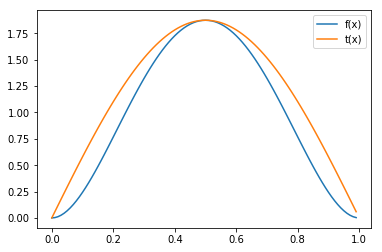

In [88]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False)) #El opt te da el maximo, y la f del principio es para evaluar f con 
#el resultado. 
# Función t
t = lambda x: max_f*np.sin(np.pi*x)

x = np.arange(0,1,.01)  # Rango donde se graficará las funciones

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

Al observar la gráfica podemos ver que efectivamente $t(x)>f(x)$

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

$$g(x)=\frac{t(x)}{c}$$ donde $$c=\int_{-\infty}^{\infty}t(x)dx$$

Primero obtenemos $$\int_{a}^{b}t(x)dx$$
donde $a=0$ y $b=1$ debido a que esos son los límites de la función en la gráfica
$$\int_{0}^{1}t(x)dx = \int_{0}^{1}a\sin(\pi x)dx= \frac{-a\cos(\pi x)}{\pi}|_{0}^{1} = -\frac{a\cos(\pi)}{\pi}+ \frac{a\cos(0)}{\pi} = \frac{a}{\pi}+\frac{a}{\pi}=\frac{2a}{\pi}$$
Por lo tanto
$$g(x)=\frac{a\sin{\pi x}}{\frac{2a}{\pi}}=\frac{\pi\sin(\pi x)}{2}$$

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

Primero es necesario encontrar $G(x)$ la cual corresponde a la distribución acumulada.
$$G(x)=\int_{0}^{x}\frac{\pi\sin(\pi x)}{2} = -\frac{cos(\pi x)}{2}\Big|_{0}^{x}=-\frac{\cos(\pi x)}{2}+\frac{1}{2}$$
Igualamos $G(x)$ a $U$
$$U=-\frac{\cos(\pi x)}{2}+\frac{1}{2}$$
$$2U=-\cos(\pi x)+1$$
$$2U-1=-\cos(\pi x)$$
$$-\cos(2U-1)=\pi x$$
$$x=\frac{\cos^{-1}(-2U+1)}{\pi}$$
Este valor corresponde a $R_2$ que sigue una distribución $g(x)$

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. 

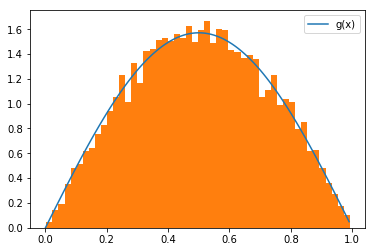

In [97]:
g = lambda x: np.pi*np.sin(np.pi*x)/2
x = np.arange(0,1,.01)
R2 = lambda u: np.arccos(1-2*u)/np.pi
N = 10000
U = np.random.rand(N)
z = R2(U)
# Gráficas de las funciones
plt.plot(x,g(x),label='g(x)')
plt.hist(z,bins=50,density=True)
plt.legend()

Al observar la distribución podemos observar que efectivamente los puntos aleatorios siguen la distribución de g(x)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados.

In [90]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()

El máximo de f es: [1.875]


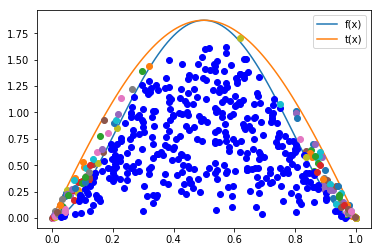

In [100]:
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
#el resultado. 
# Función t -> Función constante
t = lambda x: max_f*np.sin(np.pi*x)

x = np.arange(0,1,0.01)
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 
R_2 = lambda u: np.arccos(1-2*u)/np.pi
U = np.random.rand(N)
z = R_2(U)
R2 = z  #Si queremos distribución que siga el comportamiento de g(x)
#R2 = np.random.rand(N)  #Si queremos una distribución normal
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

Aquí podemos ver que se graficaron 500 puntos, dentro de t(x), no todos los puntos están dentro de f(x)

Ahora hacemos lo mismo, pero generando 500 puntos dentro de f(x)

In [92]:
# Función de aceptación y rechazo usando for
def Acep_rechazo3(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1) #Evalua la función con R1
    t_x = t(R1)
    condition = R2*t_x <=f_x  #Te pregunta si un vector es <= a otro vector, así que te regresa un vector con True's y False
    # Si es True se tiene que aceptar el punto, si es False no se acepta el punto.
    j=0
    i=0
    while j<N:
        if condition[i]:
            plt.plot(R1[i],R2[i]*t_x[i],'ob')
            j = i+1
            i=i+1
        else:
            i=i+1
    plt.show()
    return j

El máximo de f es: [1.875]


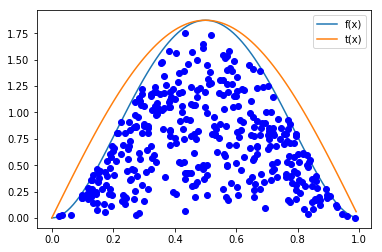

500

In [93]:
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
#el resultado. 
# Función t -> Función constante
t = lambda x: max_f*np.sin(np.pi*x)

x = np.arange(0,1,0.01)
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 
R_2 = lambda u: np.arccos(1-2*u)/np.pi
U = np.random.rand(N)
z = R_2(U)
R2 = z
R1 = np.random.rand(N)

Acep_rechazo3(R2,R1,f,t)

Podemos ver que efectivamente se graficaron 500 puntos dentro de f(x)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

In [110]:
def Acep(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#    R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    d = np.zeros(len(R1))
    condition = np.multiply(R2,t_x)<=f_x
    d = np.asarray([1 if condition[i] else 0 for i in range(len(R1))]).sum()
    return d

In [111]:
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
#el resultado. 
# Función t -> Función constante
ts = lambda x: max_f*np.sin(np.pi*x)
tc = lambda x: max_f*np.ones(len(x))
x = np.arange(0,1,0.01)

N = 500
R_2 = lambda u: np.arccos(1-2*u)/np.pi
U = np.random.rand(N)
z = R_2(U)
R2 = z
R1 = np.random.rand(N)

In [113]:
Aceptacion_Sc = Acep(R2,R1,f,tc)*100/len(R1)
Aceptacion_Ss = Acep(R2,R1,f,ts)*100/len(R1)
print('El porcentaje de puntos de aceptación cuando usas t(x) como constante: ',Aceptacion_Sc,'%')
print('El porcentaje de puntos de aceptación cuando usas t(x) como un pulso senoidal es: ',Aceptacion_Ss,'%')

El porcentaje de puntos de aceptación cuando usas t(x) como constante:  56.2 %
El porcentaje de puntos de aceptación cuando usas t(x) como un pulso senoidal es:  73.2 %


7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

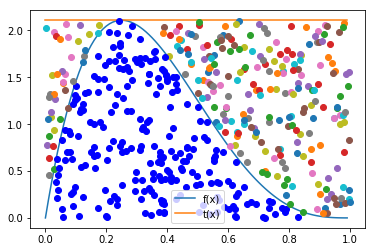

In [114]:
f = lambda x: 20*x*(1-x)**3
a = f(optimize.fmin(lambda x:-f(x),5,disp=False))
t = lambda x: a*np.ones(len(x))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend(loc="best")
N= 500
R2 = np.random.rand(N)
R1 = np.random.rand(N)
Acep_rechazo(R1, R2, f, t)

**Perfil de GitHub del creador del repositorio**
https://github.com/danielgarciah/Tarea-6_PBuenrostro_DGarcia